# OBJECTIVE

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# ATTRIBUTES INFORMATION

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

## IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [2]:
df_redwinequality = pd.read_csv(r'C:\Users\Rohan\OneDrive\Desktop\winequality.csv')

In [3]:
df_redwinequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_redwinequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_redwinequality.shape

(1599, 12)

there are 1599 rows and 12 columns in the dataset

In [6]:
df_redwinequality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

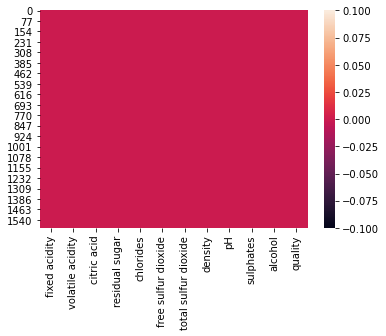

In [7]:
sns.heatmap(df_redwinequality.isnull())

there is no null value in the dataset

In [8]:
df_redwinequality.nunique

<bound method DataFrame.nunique of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.

# checking statistical values

In [9]:
df_redwinequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
list=[ 'fixed acidity' ,'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', 'quality',]

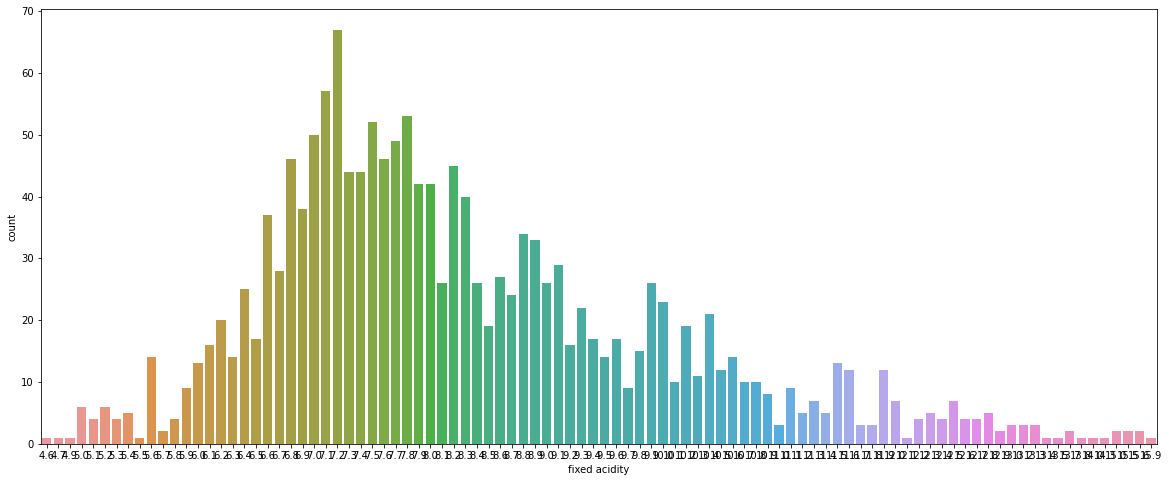

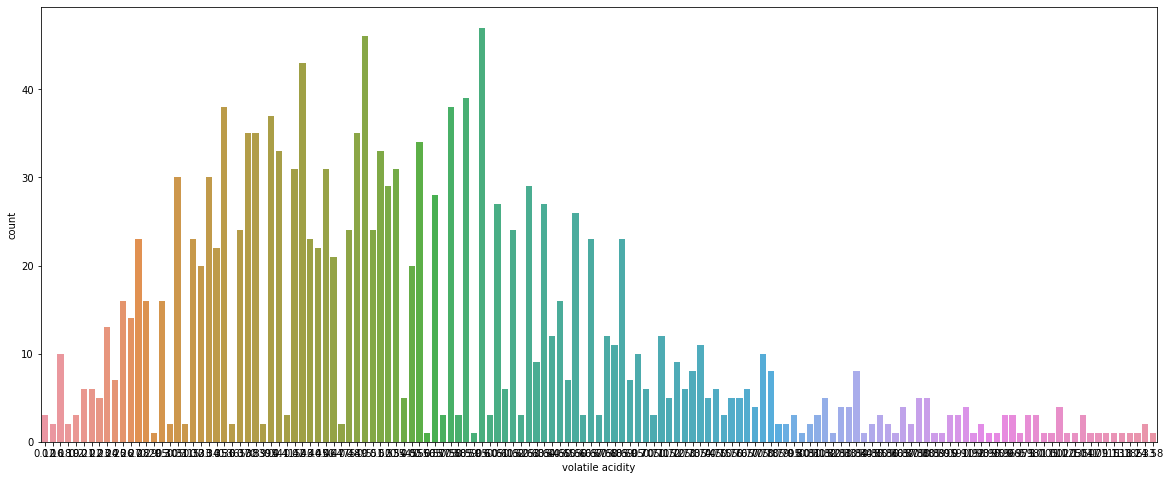

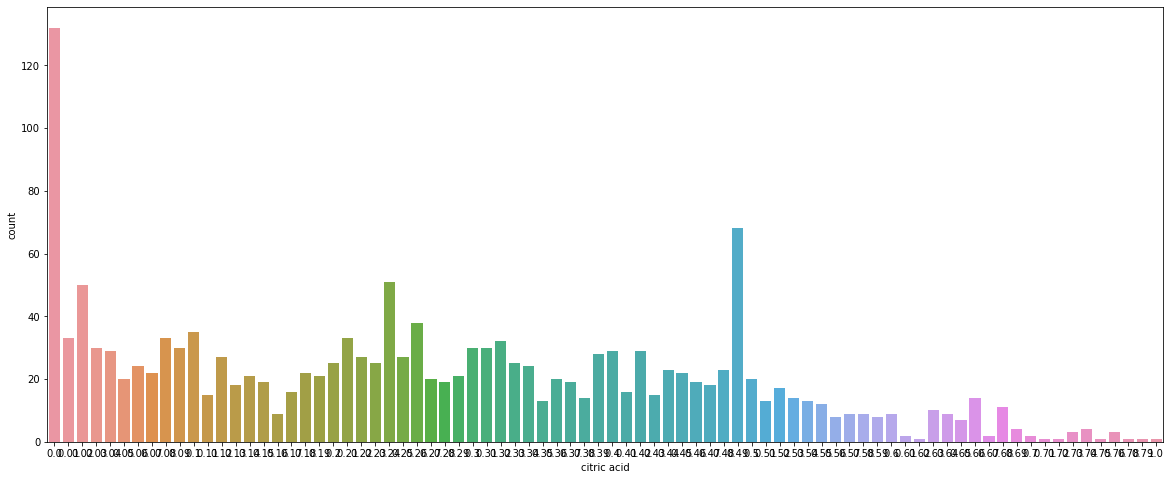

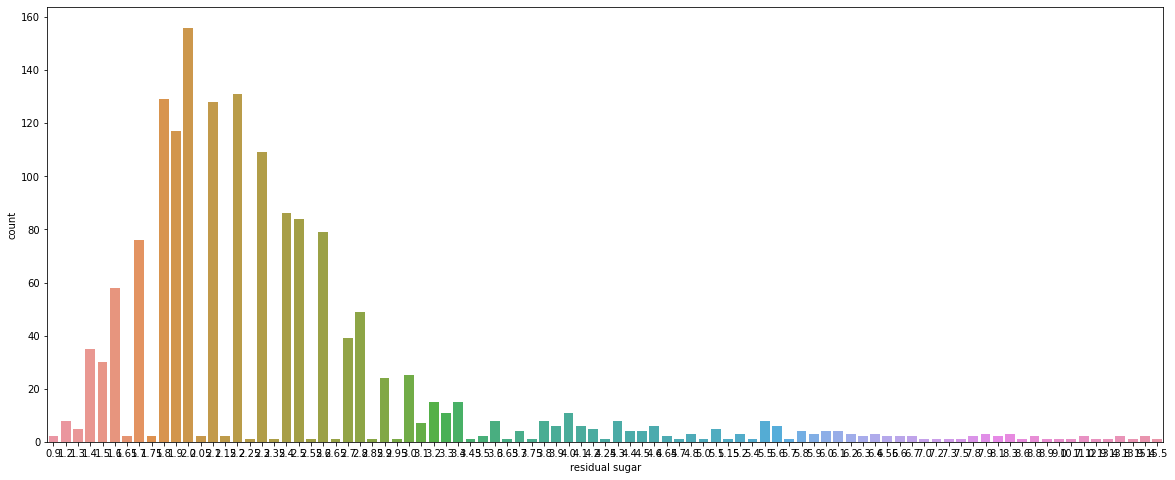

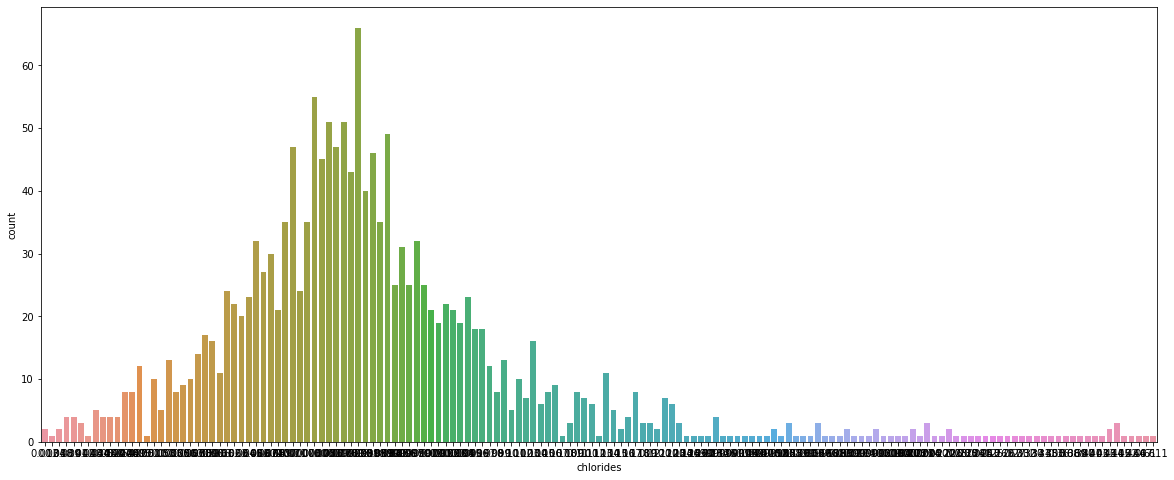

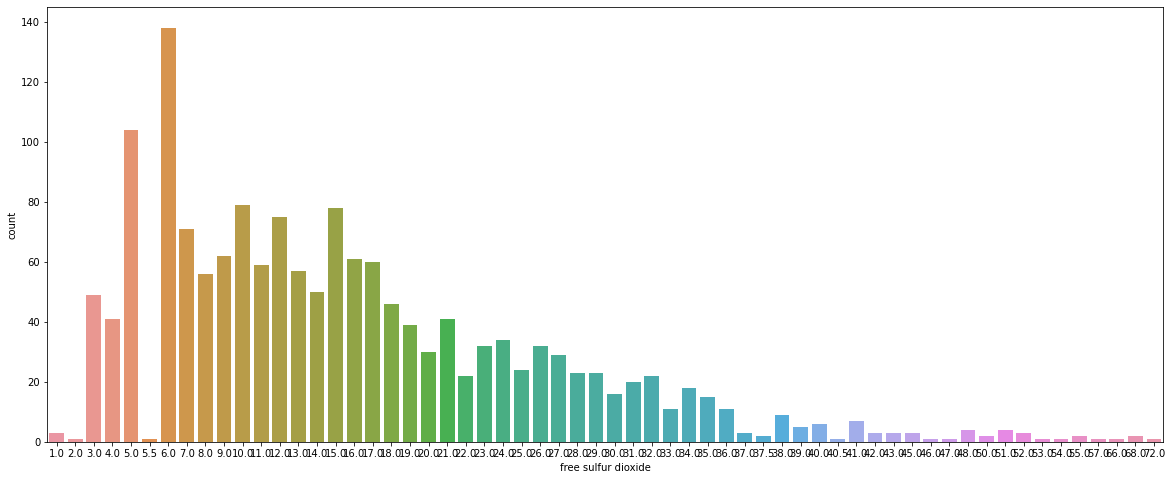

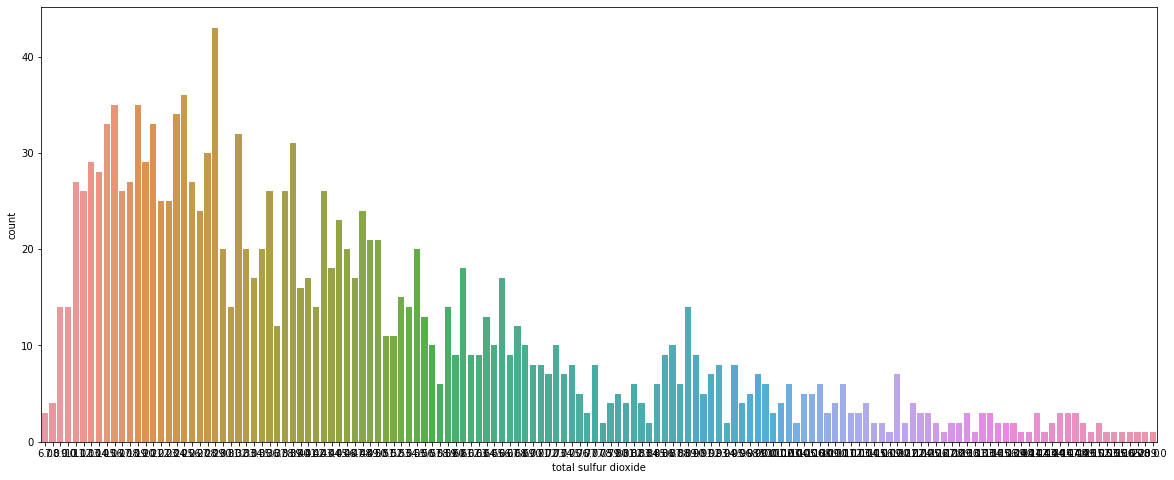

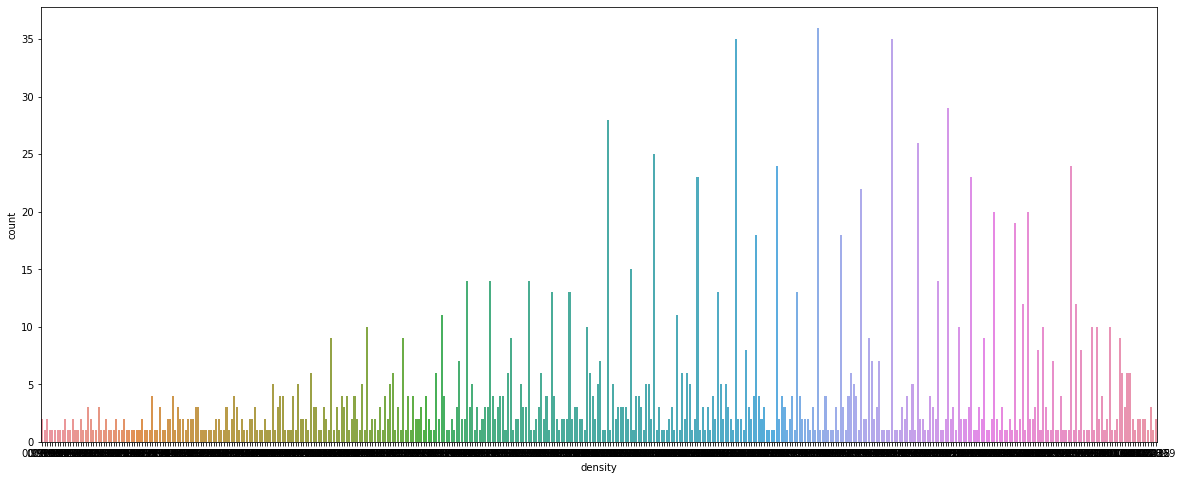

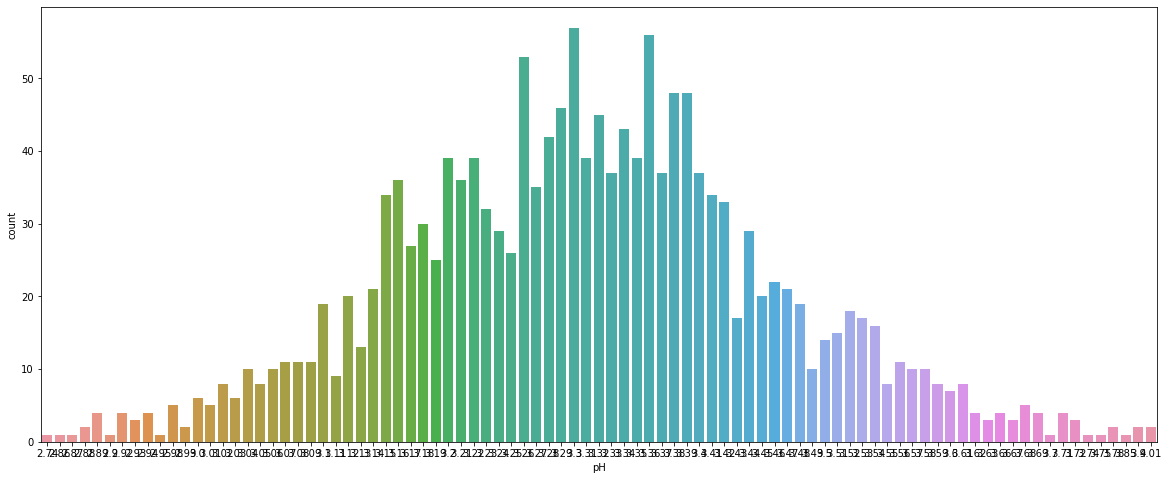

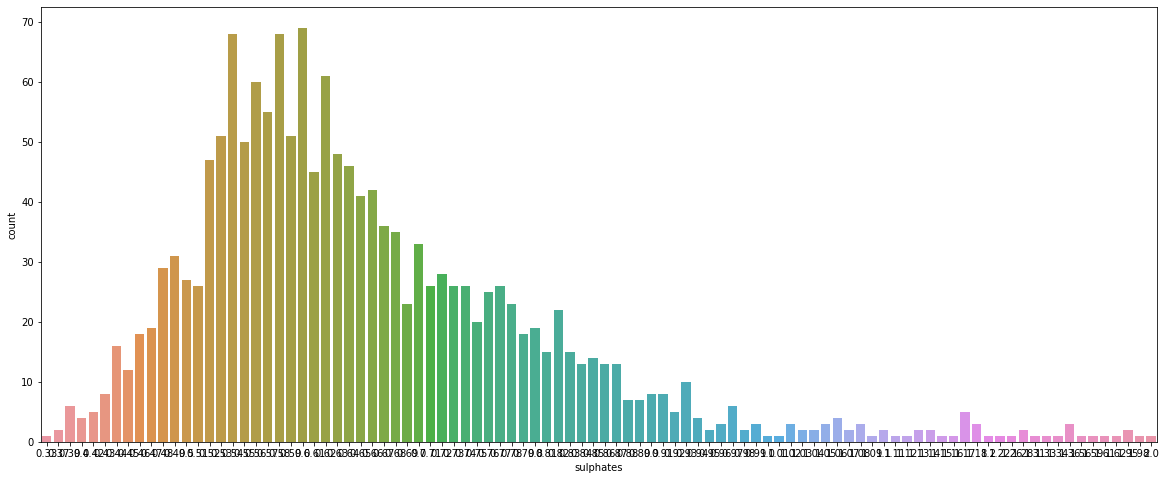

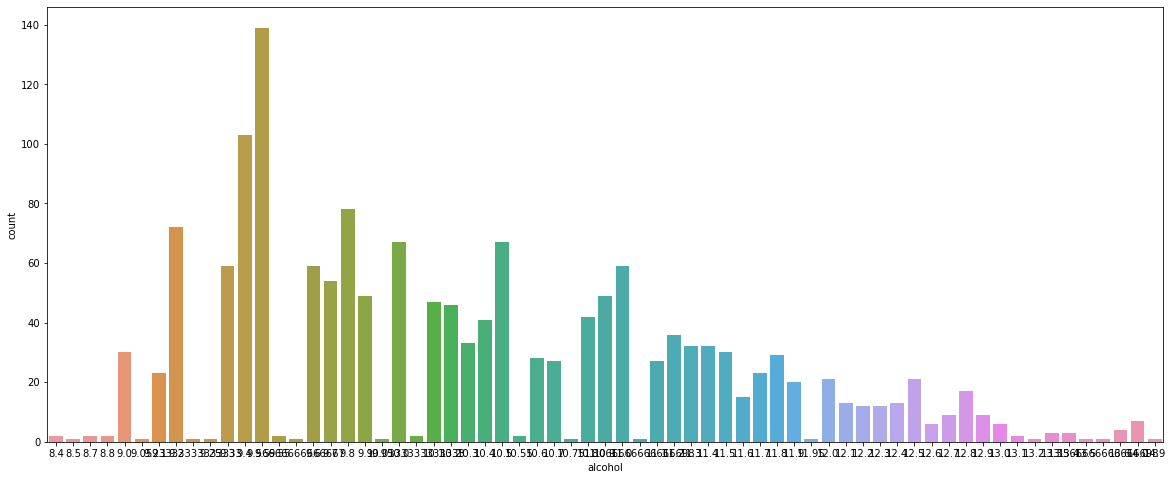

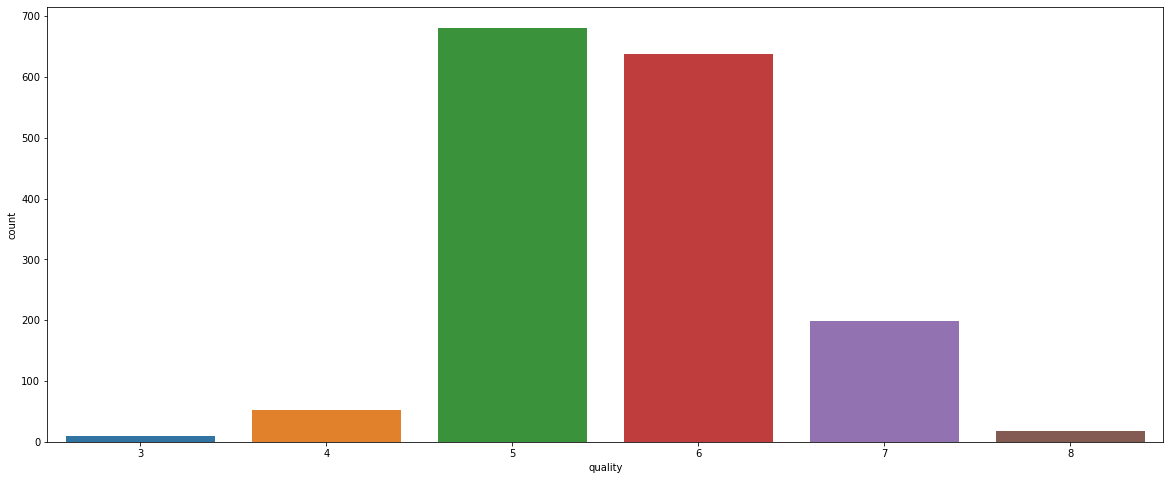

In [11]:

for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_redwinequality)
    plt.show()

classes are imbalance

fixed acidity              AxesSubplot(0.125,0.826831;0.227941x0.053169)
volatile acidity        AxesSubplot(0.398529,0.826831;0.227941x0.053169)
citric acid             AxesSubplot(0.672059,0.826831;0.227941x0.053169)
residual sugar             AxesSubplot(0.125,0.763028;0.227941x0.053169)
chlorides               AxesSubplot(0.398529,0.763028;0.227941x0.053169)
free sulfur dioxide     AxesSubplot(0.672059,0.763028;0.227941x0.053169)
total sulfur dioxide       AxesSubplot(0.125,0.699225;0.227941x0.053169)
density                 AxesSubplot(0.398529,0.699225;0.227941x0.053169)
pH                      AxesSubplot(0.672059,0.699225;0.227941x0.053169)
sulphates                  AxesSubplot(0.125,0.635423;0.227941x0.053169)
alcohol                 AxesSubplot(0.398529,0.635423;0.227941x0.053169)
quality                 AxesSubplot(0.672059,0.635423;0.227941x0.053169)
dtype: object

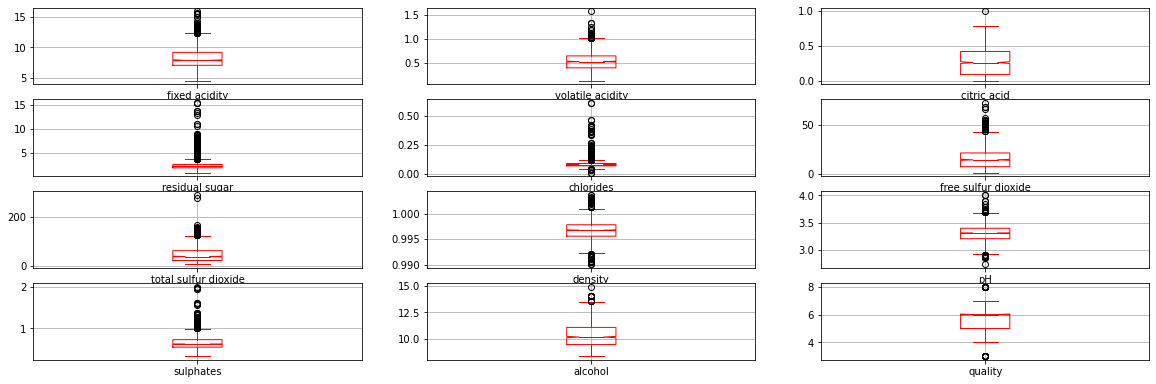

In [12]:
#checking the outliers
df_redwinequality.plot(kind='box',subplots=True,layout=(12,3),figsize=(20,20),grid=True,notch=True,color='red',legend=True)

In [13]:
# some outliers are present

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubpl

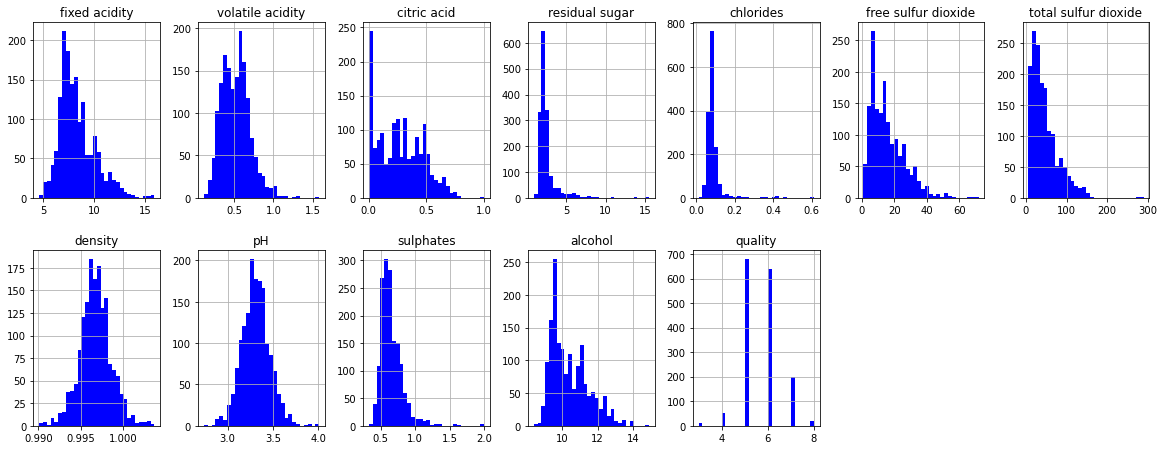

In [14]:
# checking the disturbuition using hist plot
df_redwinequality.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

density and ph are normally disturbuited and other are left skewed

In [15]:
# checking the correlation of the data
df_redwinequality.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

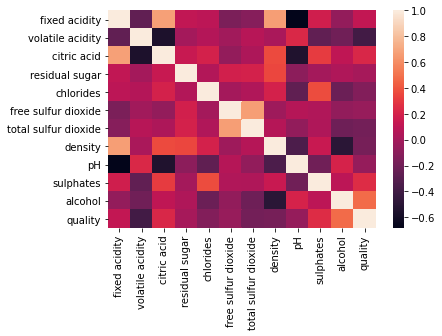

In [16]:
sns.heatmap(df_redwinequality.corr())

In [17]:
df_redwinequality.skew

<bound method DataFrame.skew of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [18]:
# removing skewness
for i  in df_redwinequality.columns:
    if df_redwinequality.skew().loc[i]>0.55:
        df_redwinequality[i]=np.log1p(df_redwinequality[i])

In [19]:
df_redwinequality.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [20]:
#removing outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df_redwinequality))
z

array([[0.49206951, 0.98751431, 1.39147228, ..., 0.60176716, 0.99166574,
        0.78782264],
       [0.23078609, 1.86351245, 1.39147228, ..., 0.18912335, 0.57421133,
        0.78782264],
       [0.23078609, 1.28941633, 1.18607043, ..., 0.00317263, 0.57421133,
        0.78782264],
       ...,
       [1.28039794, 0.04406793, 0.72391627, ..., 0.6247813 , 0.59120544,
        0.45084835],
       [1.59690876, 0.70125933, 0.77526673, ..., 0.37801568, 0.1719405 ,
        0.78782264],
       [1.51609325, 1.28074974, 1.02199944, ..., 0.06131178, 0.59120544,
        0.45084835]])

In [21]:
thresold=3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   43,   45,   81,   81,   83,
         86,   88,   91,   92,   95,  106,  106,  126,  127,  142,  144,
        147,  151,  151,  151,  151,  163,  164,  169,  169,  181,  226,
        226,  240,  243,  244,  258,  258,  274,  281,  291,  324,  325,
        339,  396,  400,  413,  415,  442,  442,  451,  459,  467,  480,
        480,  494,  517,  530,  535,  554,  554,  555,  555,  557,  557,
        566,  567,  568,  588,  595,  608,  614,  639,  649,  652,  652,
        652,  666,  672,  690,  690,  692,  695,  723,  730,  754,  773,
        776,  777,  821,  832,  836,  837,  889,  889,  899,  911,  917,
        923, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1081, 1111,
       1114, 1165, 1186, 1235, 1244, 1260, 1269, 1269, 1270, 1270, 1299,
       1299, 1300, 1312, 1316, 1319, 1319, 1321, 1370, 1372, 1374, 1374,
       1434, 1434, 1435, 1435, 1469, 1474, 1474, 1476, 1476, 1478, 1505,
       1558, 1558, 1570, 1574, 1589], dtype=int64)

In [22]:
df_redwinequalitynew=df_redwinequality[(z<3).all(axis=1)]
print(df_redwinequality.shape)
print(df_redwinequalitynew.shape)

(1599, 12)
(1480, 12)


# nearly 9% data is removed

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubpl

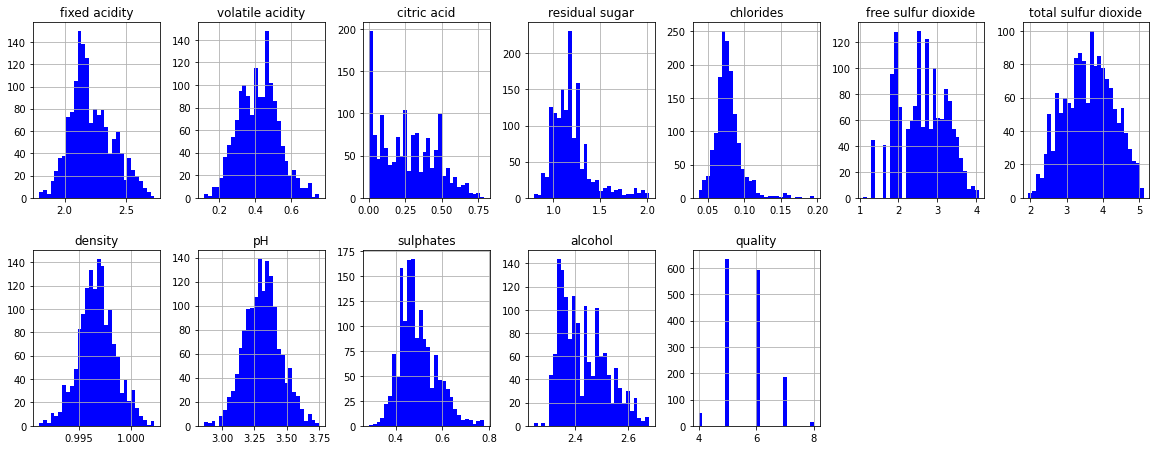

In [23]:
# checking disturbuition again after outlier removal
df_redwinequalitynew.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

now data is somehow normally disturbuited

In [24]:
df_redwinequality['quality'].values



array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [25]:
df_redwinequality['quality'].unique

<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [26]:
df_redwinequality.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [27]:
# creating a new discreet variable ratings and check the quality
# 1-4 bad - 0
# 4-7 average - 1
#7-10 good- 2
condition=[(df_redwinequality['quality']<=4),(df_redwinequality['quality'].between(4,7)),(df_redwinequality['quality'] >=7)]
rating=['0','1','2']
df_redwinequality['rating']=np.select(condition,rating)
df_redwinequality.rating.value_counts()

1    1518
0      63
2      18
Name: rating, dtype: int64

In [28]:
# now checking correlation
df_redwinequality.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.477002
sulphates               0.280984
citric acid             0.226373
fixed acidity           0.115684
residual sugar          0.021687
free sulfur dioxide    -0.050344
pH                     -0.057731
chlorides              -0.134818
total sulfur dioxide   -0.171419
density                -0.174919
volatile acidity       -0.393391
Name: quality, dtype: float64

alcohol,sulphates,citric acid,fixed acidity has correlation with variable quality hence we use these 4 for further analysis

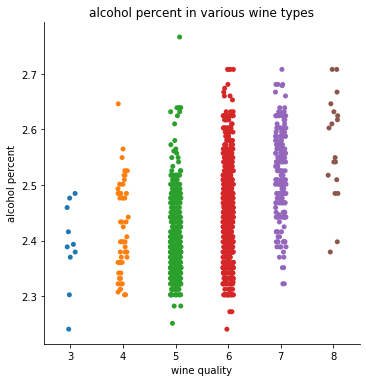

In [29]:
ab=sns.catplot(x='quality',y='alcohol',data=df_redwinequality)
ab.set(xlabel='wine quality',ylabel='alcohol percent',title='alcohol percent in various wine types')

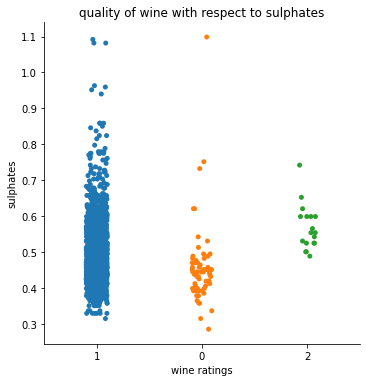

In [30]:
# with features sulphates with rating
cd=sns.catplot(x='rating',y='sulphates',data=df_redwinequality)
cd.set(xlabel='wine ratings',ylabel='sulphates',title='quality of wine with respect to sulphates')

average no. of wines are more

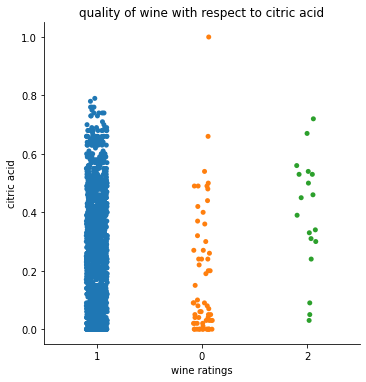

In [31]:
# with features citric acid with rating
ef=sns.catplot(x='rating',y='citric acid',data=df_redwinequality)
ef.set(xlabel='wine ratings',ylabel='citric acid',title='quality of wine with respect to citric acid')

average no. of wine are more

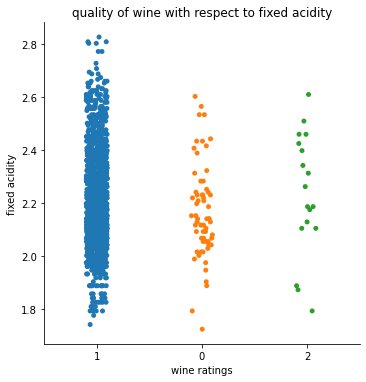

In [32]:
# with features fixed acidity with rating
gh=sns.catplot(x='rating',y='fixed acidity',data=df_redwinequality)
gh.set(xlabel='wine ratings',ylabel='fixed acidity',title='quality of wine with respect to fixed acidity')

In [33]:
# dropping the target variable to fit in the standard scaling
x=df_redwinequalitynew.drop(['quality'],axis=1)

In [34]:
x.shape

(1480, 11)

In [35]:
y=df_redwinequalitynew['quality']

In [36]:
y.shape

(1480,)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.513886  ,  1.02912633, -1.38675777, ...,  1.3719621 ,
        -0.62759564, -1.02937042],
       [-0.24400039,  1.93251643, -1.38675777, ..., -0.805861  ,
         0.31191446, -0.59611096],
       [-0.24400039,  1.34046866, -1.17827572, ..., -0.38434685,
         0.08348333, -0.59611096],
       ...,
       [-1.32816843, -0.03471289, -0.70919112, ...,  0.73969088,
         0.82943875,  0.61342914],
       [-1.65509967,  0.73392032, -0.76131163, ...,  1.79347625,
         0.53630235, -0.17860993],
       [-1.57162349, -1.31006503,  1.06290627, ...,  0.5289338 ,
         0.16008528,  0.61342914]])

# MODEL TRAINING

In [38]:
# importing necessary libraries from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#ensemble techniques
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier

# model selection libraries
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.model_selection import GridSearchCV

# importing some metrics to see model performance
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn .metrics import precision_score,recall_score,f1_score



In [39]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
kn =KNeighborsClassifier()
AB = AdaBoostClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
ETC = ExtraTreesClassifier()

In [75]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GradientBoostingClassifier',GB))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AB))
models.append(("ExtraTreesClassifier",ETC))

In [81]:

Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    
    
    #**********cvs score**************
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)

    
#................classification report...........................    
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\n\n')

*************************** LogisticRegression *****************************


LogisticRegression()


Learning Score :  0.6182432432432432
Accuracy Score :  0.6385135135135135
Cross Val Score :  0.5912162162162161


Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.71      0.80      0.76       127
           6       0.59      0.61      0.60       119
           7       0.50      0.38      0.43        37
           8       0.00      0.00      0.00         3

    accuracy                           0.64       296
   macro avg       0.36      0.36      0.36       296
weighted avg       0.61      0.64      0.62       296



Confusion Matrix:
 [[  0   7   2   1   0]
 [  0 102  25   0   0]
 [  1  33  73  12   0]
 [  0   1  22  14   0]
 [  0   0   2   1   0]]





*************************** DecisionTreeClassifier *****************************


DecisionTreeClassifier()


Learning Score :  1